# Download do dataset

O comando abaixo realiza o download da base de dados direto da fonte

In [1]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00501/PRSA2017_Data_20130301-20170228.zip

--2019-11-25 12:04:34--  https://archive.ics.uci.edu/ml/machine-learning-databases/00501/PRSA2017_Data_20130301-20170228.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7959991 (7,6M) [application/x-httpd-php]
Saving to: ‘PRSA2017_Data_20130301-20170228.zip’

PRSA2017_Data_20130 100%[===================>]   7,59M   976KB/s    in 7,7s    

2019-11-25 12:04:43 (1008 KB/s) - ‘PRSA2017_Data_20130301-20170228.zip’ saved [7959991/7959991]



O arquivo vem zipado e por isso é necessário utilizar o comando unzip

In [2]:
!unzip PRSA2017_Data_20130301-20170228.zip

Archive:  PRSA2017_Data_20130301-20170228.zip
replace PRSA_Data_20130301-20170228/PRSA_Data_Aotizhongxin_20130301-20170228.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: ^C


Importa as bibliotecas necessárias para que o programa.

O Arquivo zipado contém varios arquivos csv de diferentes centrais.
Por isso foi criado um único Dataframe que contém todos os dados de cada arquivo csv.

Foi criado uma coluna que contém os valores de ano, mês, dia e hora.

Também foi criado uma tabela que será preenchida com os valores médios mensais de PM2.5 e PM10.

In [84]:
%matplotlib inline
import pandas as pd
import glob

import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

path = "PRSA_Data_20130301-20170228/"

df = pd.concat([pd.read_csv(file) for file in glob.glob(path + "*")])
df["tempo"] = pd.to_datetime(df.year*1000000 + df.month*10000 + df.day*100 + df.hour, format="%Y%m%d%H")
pf = pd.DataFrame(columns=["month", "year", "PM2.5mean", "PM10mean", "station"])

Visualização da tabela geral:

In [85]:
df.head(10)

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,tempo
0,1,2013,3,1,0,6.0,18.0,5.0,NaN,800.0,88.0,0.1,1021.1,-18.6,0.0,NW,4.4,Gucheng,2013-03-01 00:00:00
1,2,2013,3,1,1,6.0,15.0,5.0,NaN,800.0,88.0,-0.3,1021.5,-19.0,0.0,NW,4.0,Gucheng,2013-03-01 01:00:00
2,3,2013,3,1,2,5.0,18.0,NaN,NaN,700.0,52.0,-0.7,1021.5,-19.8,0.0,WNW,4.6,Gucheng,2013-03-01 02:00:00
3,4,2013,3,1,3,6.0,20.0,6.0,NaN,NaN,NaN,-1.0,1022.7,-21.2,0.0,W,2.8,Gucheng,2013-03-01 03:00:00
4,5,2013,3,1,4,5.0,17.0,5.0,NaN,600.0,73.0,-1.3,1023.0,-21.4,0.0,WNW,3.6,Gucheng,2013-03-01 04:00:00
5,6,2013,3,1,5,4.0,11.0,3.0,NaN,700.0,87.0,-1.8,1023.6,-21.9,0.0,E,1.2,Gucheng,2013-03-01 05:00:00
6,7,2013,3,1,6,3.0,6.0,3.0,NaN,700.0,92.0,-2.6,1024.3,-20.4,0.0,ENE,1.2,Gucheng,2013-03-01 06:00:00
7,8,2013,3,1,7,5.0,5.0,3.0,NaN,800.0,86.0,-0.9,1025.6,-20.5,0.0,ENE,1.1,Gucheng,2013-03-01 07:00:00
8,9,2013,3,1,8,5.0,9.0,5.0,NaN,900.0,81.0,0.1,1026.1,-20.3,0.0,ENE,3.0,Gucheng,2013-03-01 08:00:00
9,10,2013,3,1,9,4.0,10.0,6.0,NaN,900.0,82.0,1.1,1026.1,-20.6,0.0,NE,2.8,Gucheng,2013-03-01 09:00:00


Criação de uma nova tabela com os valores médios mensais de PM2.5 e PM10 para cada ano e para cada estação.

In [76]:
import numpy as np

for year in df.year.unique():
    for station in df.station.unique():
        for month in df.month.unique():
            pm25m = np.nanmean(df[(df["year"] == year) & (df["station"] == station) & (df["month"] == month)]["PM2.5"])
            pm10m = np.nanmean(df[(df["year"] == year) & (df["station"] == station) & (df["month"] == month)]["PM10"])
            pf = pf.append({'month' : month , 'year' : year, "PM2.5mean": pm25m, "PM10mean": pm10m, "station": station} , ignore_index=True)

/home/sicca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: Mean of empty slice
  
/home/sicca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: Mean of empty slice
  import sys


Visualização:

In [77]:
pf.head(10)

,month,year,PM2.5mean,PM10mean,station
0,3,2013,108.841398,146.453315,Gucheng
1,4,2013,65.573487,109.714894,Gucheng
2,5,2013,82.270492,150.411924,Gucheng
3,6,2013,106.907154,132.148045,Gucheng
4,7,2013,63.578801,83.435550,Gucheng
5,8,2013,58.682369,89.669811,Gucheng
6,9,2013,80.326360,100.510431,Gucheng
7,10,2013,95.950269,120.115591,Gucheng
8,11,2013,77.456704,93.835883,Gucheng
9,12,2013,81.302419,99.108871,Gucheng


# Análise do PM2.5

Primeiramente aplicou-se o método describe() para verificar os valores mínimo, máximo, média e percentis.

In [8]:
df["PM2.5"].describe()

count    412029.000000
mean         79.793428
std          80.822391
min           2.000000
25%          20.000000
50%          55.000000
75%         111.000000
max         999.000000
Name: PM2.5, dtype: float64

Após isso utilizou-se a biblioteca seaborn para montar vários gráficos de histograma.

Os gráficos estão organizados a partir das informações adquiridas por cada estações e a cada ano.

Abaixo podemos ver o resultado das concentrações.

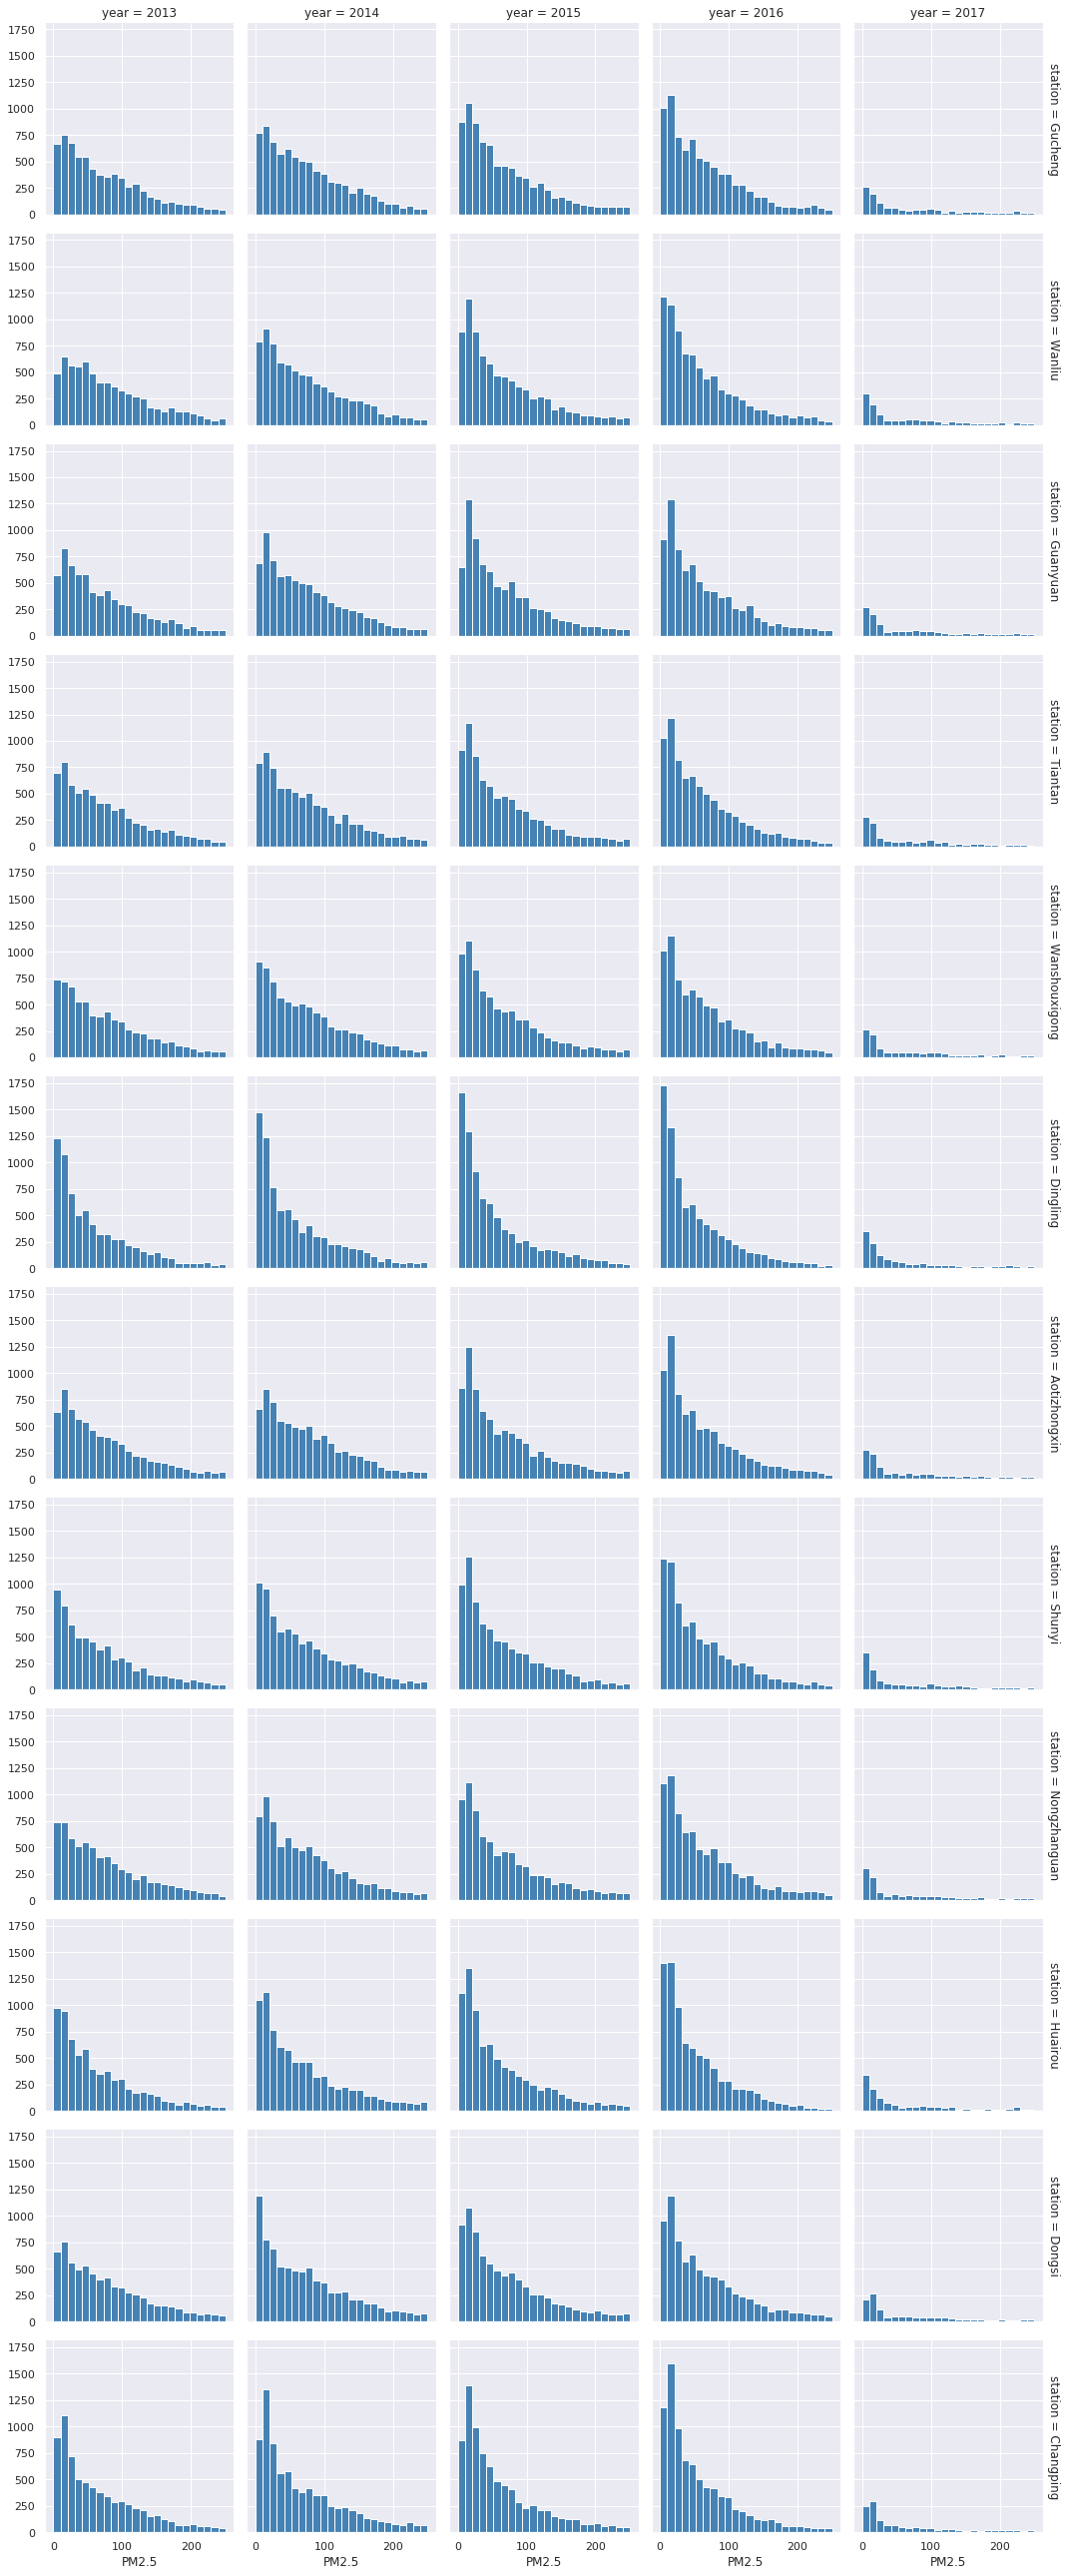

In [80]:
sns.set(style="darkgrid")

g1 = sns.FacetGrid(df, row="station", col="year", margin_titles=True)
bins = np.linspace(0, 250, 25)
g1.map(plt.hist, "PM2.5", color="steelblue", bins=bins)

As 12 estação obtiveram resultados próximos, com concentrações superiores a nível mais baixo.
Podemos notar que a concentração a níveis mais baixos tende a aumentar com o passar dos anos.

Abaixo temos o gráfico de barras de valor médio por mês para cada ano e para cada estação:

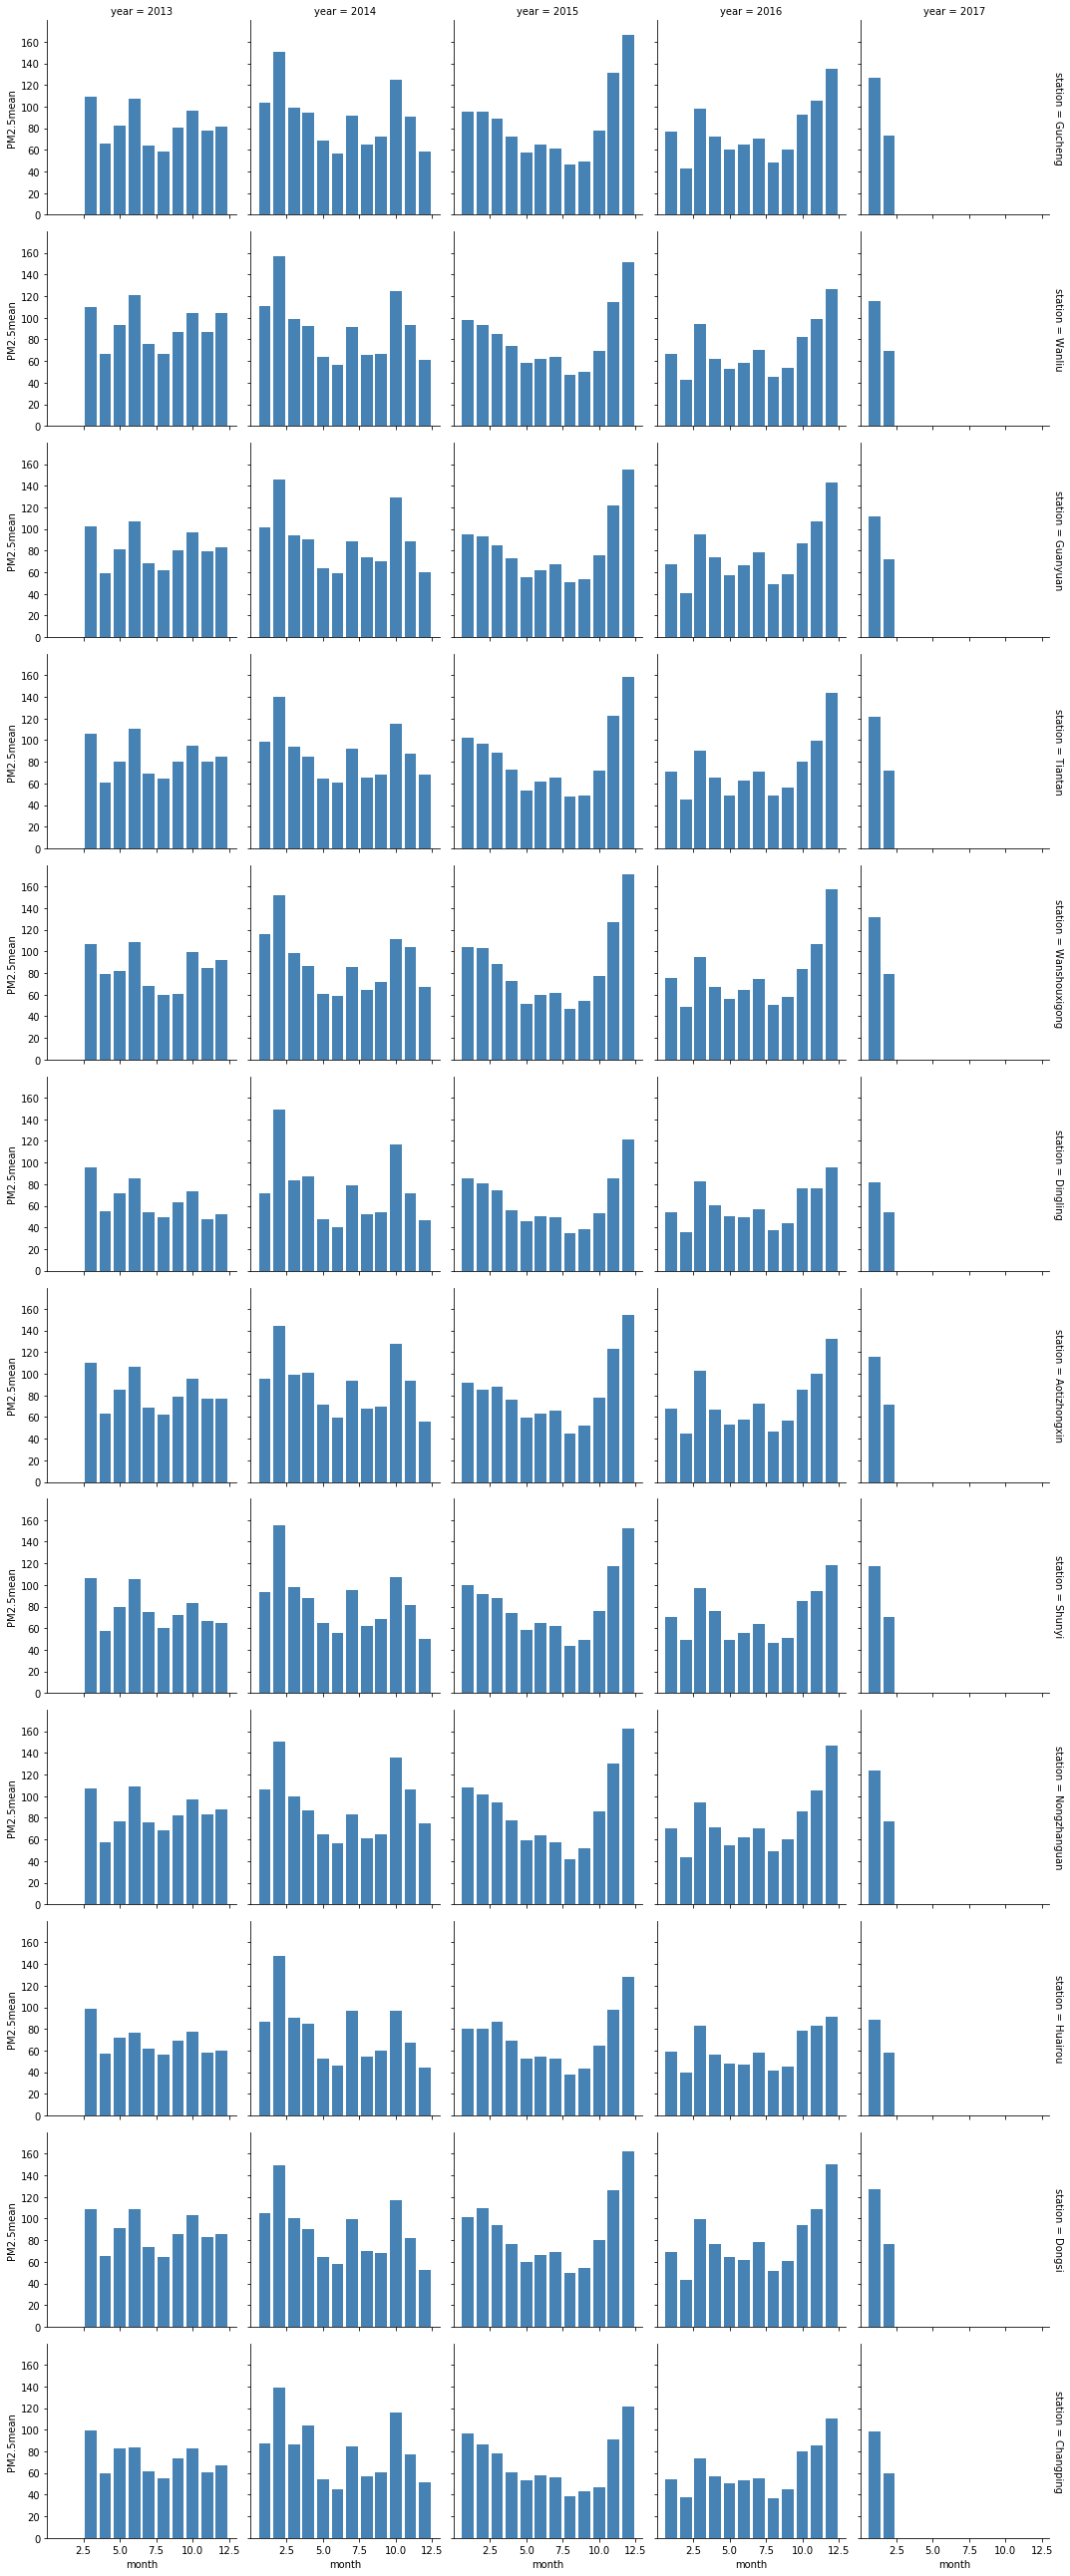

In [78]:
f1 = sns.FacetGrid(pf, row="station", col="year", margin_titles=True)
f1.map(plt.bar, "month", "PM2.5mean", color="steelblue")

O valor entre as estações mantém valor semelhante.
Porém podemos notar que o comportamento muda ao longo dos anos, com uma diminuição de concentração no meio do ano e um aumento de concentração no final do ano.

# Análise do PM10

Primeiramente aplicou-se o método describe() para verificar os valores mínimo, máximo, média e percentis.

In [72]:
df["PM10"].describe()

count    414319.000000
mean        104.602618
std          91.772426
min           2.000000
25%          36.000000
50%          82.000000
75%         145.000000
max         999.000000
Name: PM10, dtype: float64

Como na análise anterior, utilizou-se de gráficos de histogramas para visualização.

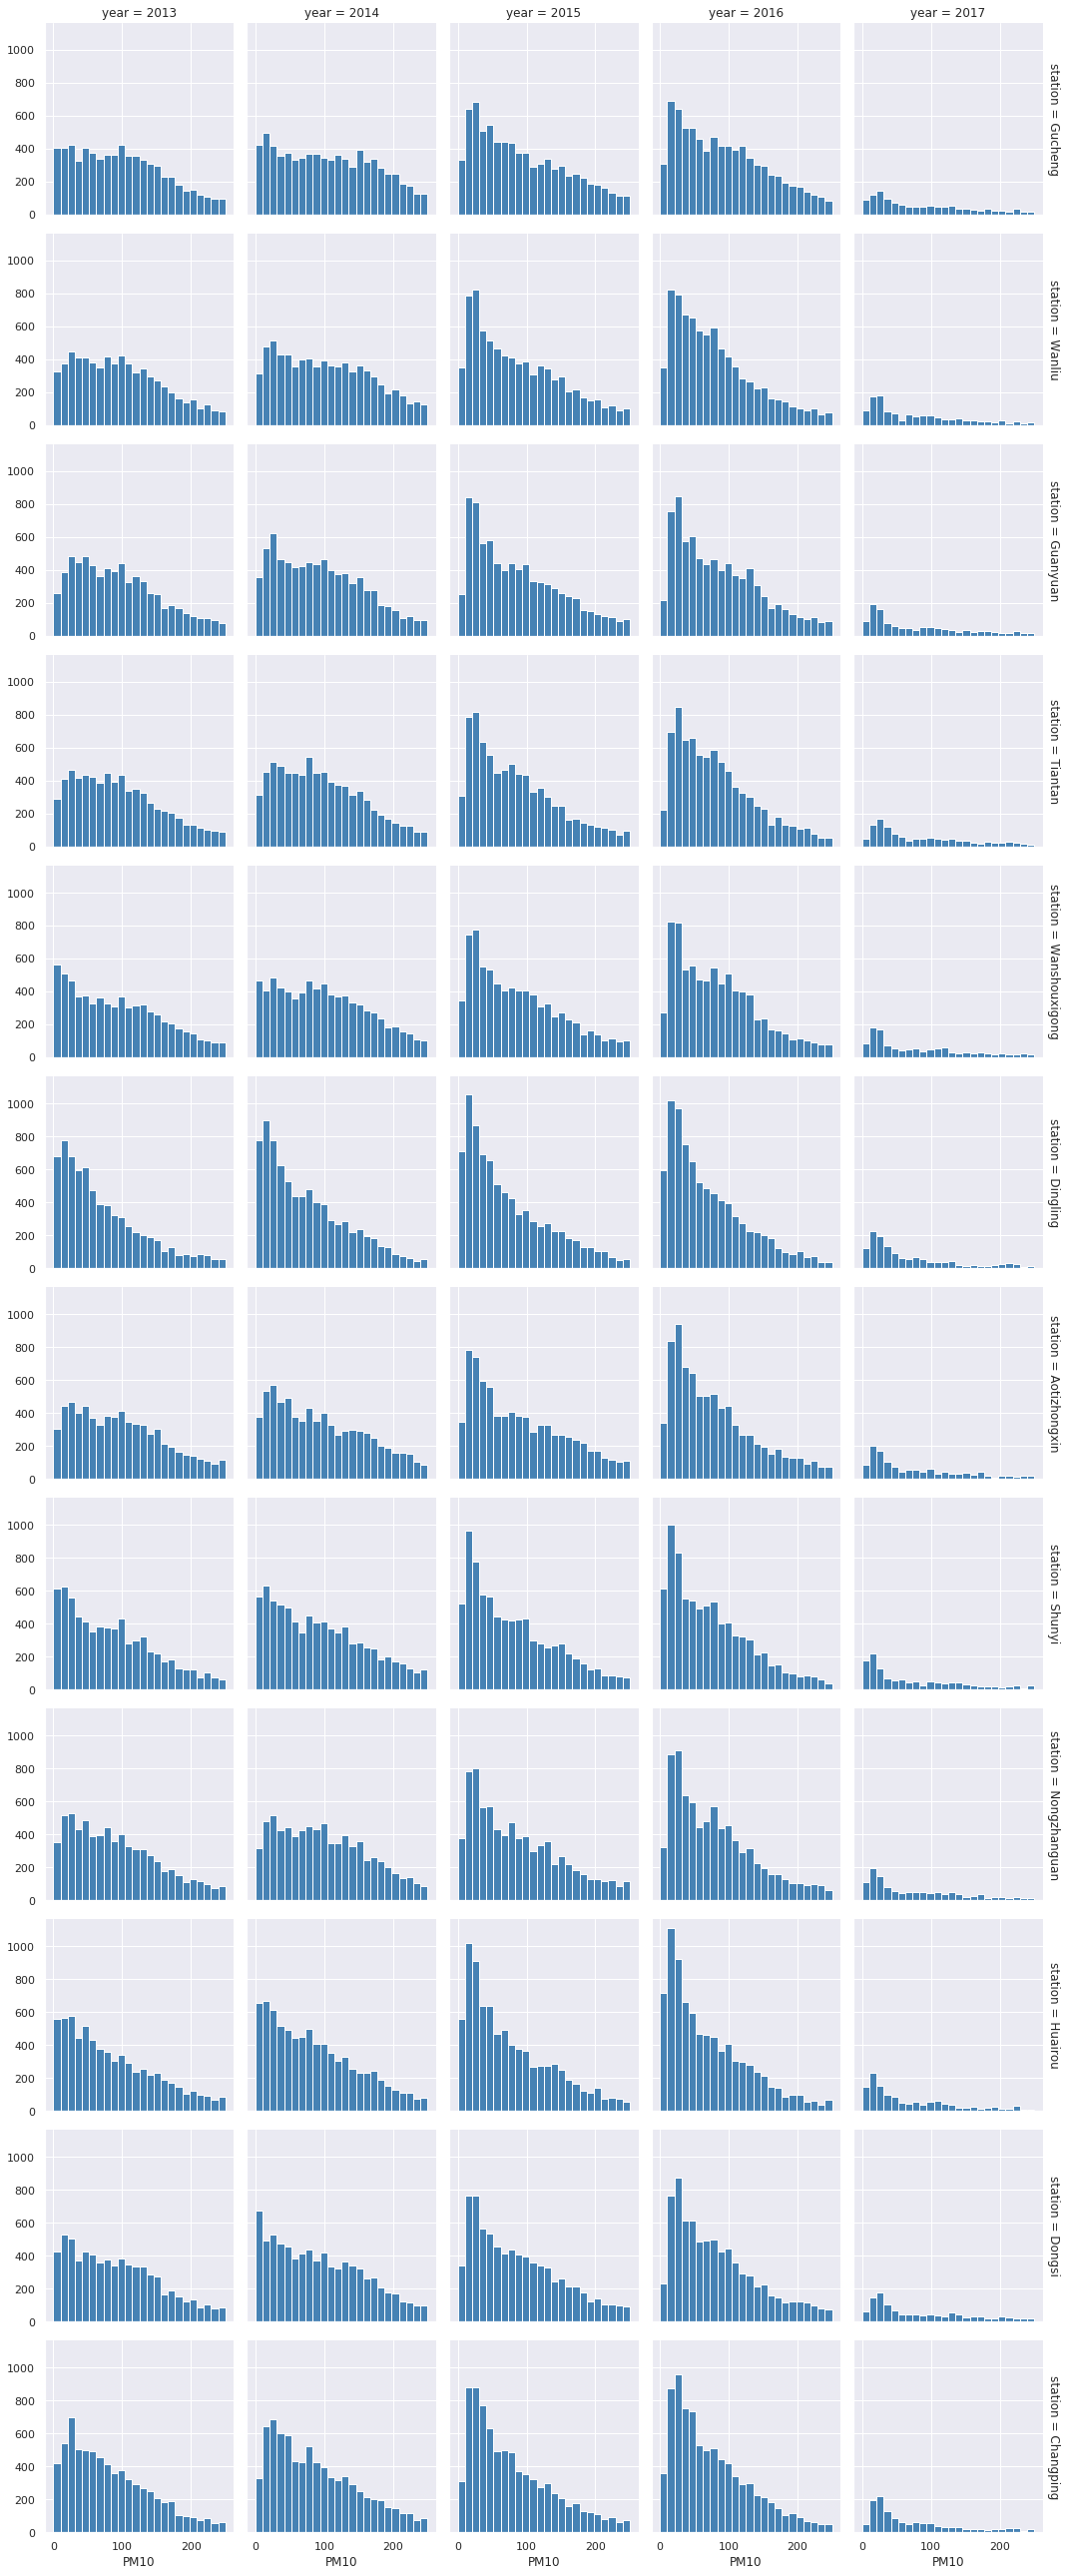

In [82]:
g2 = sns.FacetGrid(df, row="station", col="year", margin_titles=True)
g2.map(plt.hist, "PM10", color="steelblue", bins=bins)

Para o atributo PM10, a concentração é maior em valores entre 0 e 100.

Diferente do PM2.5, o PM10 tem valores mais elevados em concentrações pŕoximas de 100. O que pode dizer que este composto está mais presente do que o PM2.5.

Abaixo temos o gráfico de barras de valor médio por mês para cada ano e para cada estação:

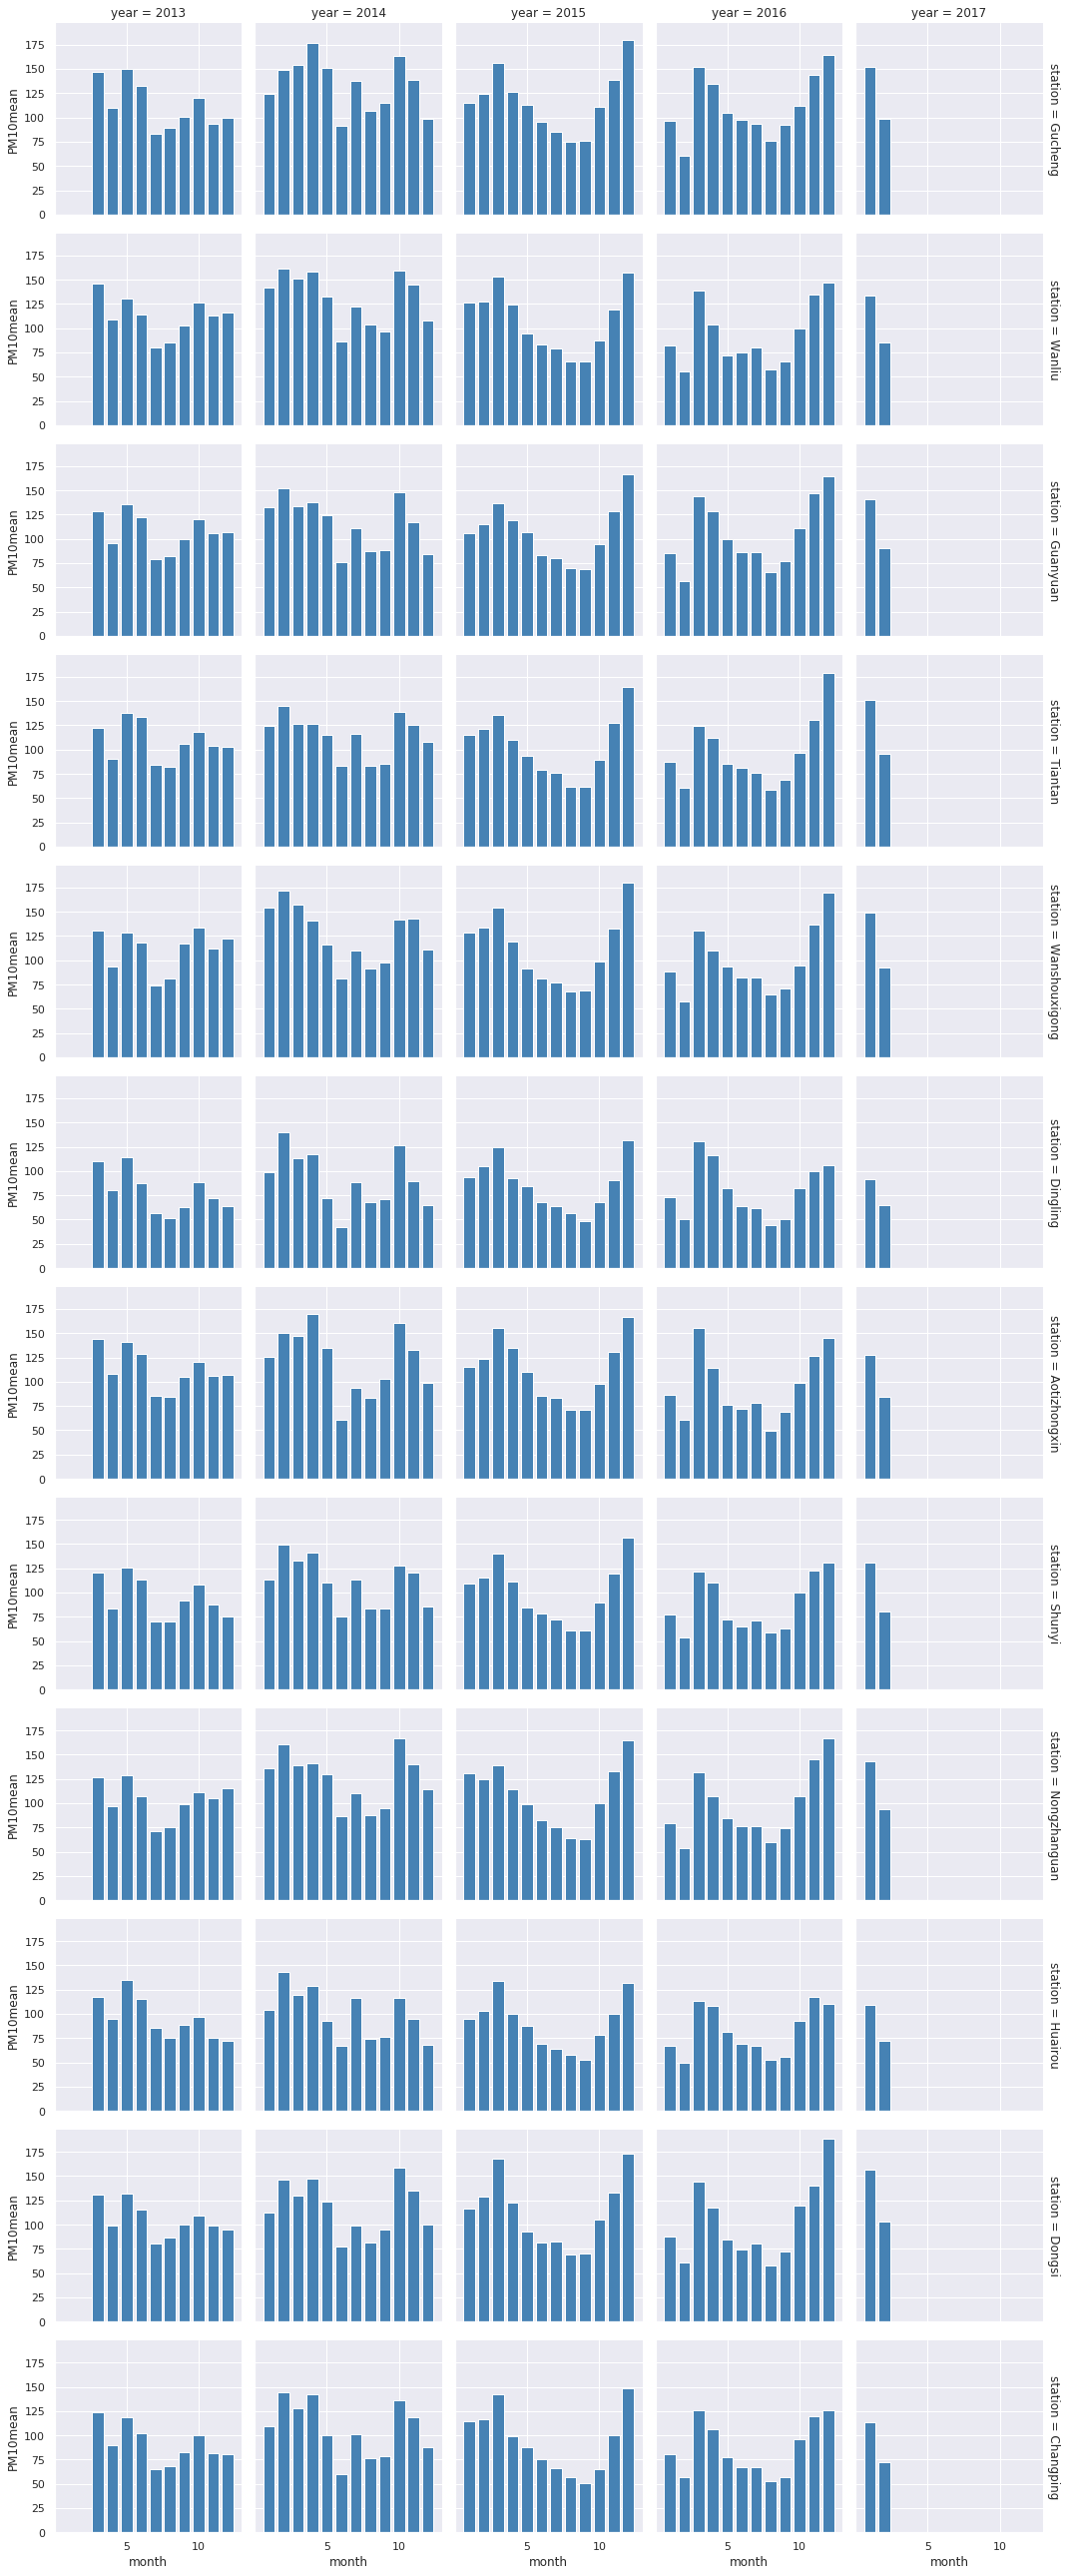

In [83]:
f2 = sns.FacetGrid(pf, row="station", col="year", margin_titles=True)
f2.map(plt.bar, "month", "PM10mean", color="steelblue")

Como na análise anterior, nota-se que os dados obtidos entre as estações são parecidos.

Ao longo dos anos, porém, existe um aumento de concentração de PM10 no ínicio e no fim do ano e uma diminuição no meio do ano.

# Análise de Correlação

A análise de correlação busca encontrar alguma relação entre os elementos da tabela, no caso estamos buscando a relação entre o atributo PM2.5 e PM10 em relação aos outros atributos.

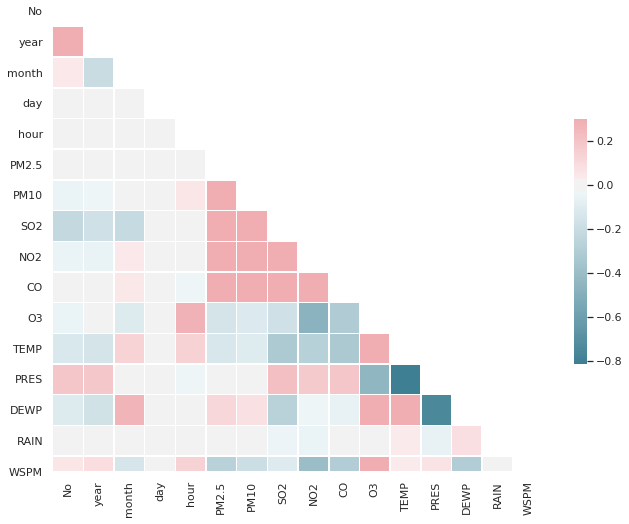

In [15]:
sns.set(style="white")

corr = df.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(11, 9))

cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

A análise mostra que tanto o PM2.5 quanto o PM10 possuem baixo índice de correlação com os outros elementos da tabela.

O que indica que nenhum dos outros atributos se relaciona de forma direta com a quantidade dos composto PM2.5 e PM10.

Essa demonstração visa aprensentar conhecimentos em relação à manipulação e demonstração de dados em python.